In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
df.info() # This shows age and cabin columns have null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [30]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [31]:
df.fillna({'Age' : df['Age'].median()}, inplace=True) # Replaced null values with median age.
df.fillna({'Embarked' : df['Embarked'].mode()[0]}, inplace=True) # Replaced null values with the most frequent element.

In [32]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [33]:
df['Sex'] = df['Sex'].map({'male': 0, 'female' : 1})

In [34]:
df['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [57]:
df['Embarked'] = df['Embarked'].map({'S' : 0, 'C' : 1, 'Q' : 2})

In [ ]:
df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)

In [59]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,0
887,888,1,1,1,19.0,0,0,30.0000,0
888,889,0,3,1,28.0,1,2,23.4500,0
889,890,1,1,0,26.0,0,0,30.0000,1


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [61]:
y = df['Survived']
X = df.drop('Survived', axis=1)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
# Importing different classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier


In [71]:
classifiers = {
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(kernel="linear", C=1),
    "RBF SVM": SVC(kernel="rbf", gamma=0.5, C=1),
    "Gaussian Process": GaussianProcessClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Neural Net": MLPClassifier(max_iter=1000),
    "AdaBoost": AdaBoostClassifier(),
    "Naive Bayes": GaussianNB(),
    "QDA": QuadraticDiscriminantAnalysis()
}

results = {}

for name, clf in classifiers.items():
    try:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results[name] = acc
    except Exception as e:
        results[name] = f"Failed: {e}"

In [72]:
results_df = pd.DataFrame(list(results.items()), columns=['Classifier', 'Accuracy'])
results_df.sort_values(by='Accuracy', ascending=False, inplace=True)
results_df = results_df.reset_index(drop=True)
results_df

,Classifier,Accuracy
0,Random Forest,0.821229
1,QDA,0.804469
2,AdaBoost,0.798883
3,Neural Net,0.793296
4,Linear SVM,0.782123
5,Naive Bayes,0.776536
6,Decision Tree,0.759777
7,Nearest Neighbors,0.659218
8,Gaussian Process,0.597765
9,RBF SVM,0.592179


## Improving this further using:
- Feature Scaling
- Cross Validation
- Grid Search(Hyperparameter Tuning)
- Visualization

In [74]:
from sklearn.preprocessing import StandardScaler

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [75]:
from sklearn.model_selection import cross_val_score
import numpy as np

In [76]:
result = {}

for name, clf in classifiers.items():
    try:
        scores = cross_val_score(clf, X_scaled, y, cv=5, scoring='accuracy')
        result[name] = round(scores.mean(), 4)
    except Exception as e:
        result[name] = f"Failed: {e}"

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterat

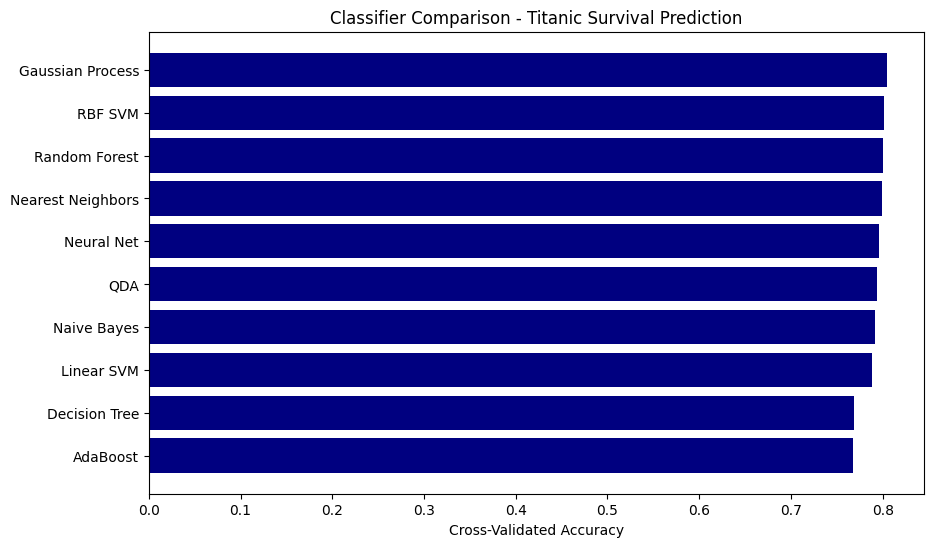

In [87]:
import matplotlib.pyplot as plt

# Sort results
sorted_result = dict(sorted(result.items(), key=lambda item: item[1] if isinstance(item[1], float) else -1, reverse=True))

# Plot
plt.figure(figsize=(10, 6))
plt.barh(list(sorted_result.keys()), list(sorted_result.values()), color='navy')
plt.xlabel("Cross-Validated Accuracy")
plt.title("Classifier Comparison - Titanic Survival Prediction")
plt.gca().invert_yaxis()
plt.show()